In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data.txt",delimiter="|" )

In [3]:
df.head()

,date,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,1950 Q1,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NaN,NaN
1,1950 Q2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
2,1950 Q3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
3,1950 Q4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
4,1951 Q1,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160


In [4]:
df = df.fillna(0)

In [5]:
df = df.drop(["date"],1)

In [6]:
X = df.drop(["consumption"],1)
y = df["consumption"]

In [7]:
X_train,X_test,y_train, y_test = tts(X,y, test_size = 0.3, random_state = 0)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test,y_pred)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {r2_score(y_test,y_pred)}')

Coefficients: [ 6.08160936e-01  5.98127474e-03 -6.72765730e-02  2.10219166e-01
 -2.95851224e-01  4.17371880e-02 -1.33735665e+01  1.65509457e+01
 -3.21075028e+00  7.32020177e+00  7.00233186e+00]
Intercept: 257.736548885252
R^2 score1: 0.9996934609457668
R^2 score: 0.9996665024550234


In [18]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.868e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:44:38   Log-Likelihood:                -947.01
No. Observations:                 204   AIC:                             1918.
Df Residuals:                     192   BIC:                             1958.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.4851     97.577      2.167      0.031      19.024     403.946
gdp            0.6136      0.044     13.921      0.000       0.527       0.701
invest         0.0029      0.059      0.049      0.961      -0.113       0.119
government    -0.0946      0.065     -1.450      0.149      -0.223       0.034
dpi            0.2055      0.038      5.393      0.000       0.130       0.281
cpi           -0.1775      0.194     -0.915      0.361      -0.560       0.205
m1            -0.0182      0.060     -0.302      0.763      -0.137       0.101
tbill        -10.2341     24.973     -0.410      0.682     -59.490      39.022
unemp         14.5239      3.598      4.036      0.000       7.427      21.621
population    -2.8033      0.912     -3.072      0.002      -4.603      -1.004
inflation      2.5394     25.044      0.101      0.919     -46.857      51.936
interest       2.5432     25.191      0.101      0.920     -47.143      52.229
==============================================================================
Omnibus:                        5.883   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                8.149
Skew:                           0.136   Prob(JB):                       0.0170
Kurtosis:                       3.940   Cond. No.                     3.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import statsmodels.formula.api as sm
model = sm.ols(formula= 'y~X', data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.868e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:44:44   Log-Likelihood:                -947.01
No. Observations:                 204   AIC:                             1918.
Df Residuals:                     192   BIC:                             1958.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    211.4851     97.577      2.167      0.031      19.024     403.946
X[0]           0.6136      0.044     13.921      0.000       0.527       0.701
X[1]           0.0029      0.059      0.049      0.961      -0.113       0.119
X[2]          -0.0946      0.065     -1.450      0.149      -0.223       0.034
X[3]           0.2055      0.038      5.393      0.000       0.130       0.281
X[4]          -0.1775      0.194     -0.915      0.361      -0.560       0.205
X[5]          -0.0182      0.060     -0.302      0.763      -0.137       0.101
X[6]         -10.2341     24.973     -0.410      0.682     -59.490      39.022
X[7]          14.5239      3.598      4.036      0.000       7.427      21.621
X[8]          -2.8033      0.912     -3.072      0.002      -4.603      -1.004
X[9]           2.5394     25.044      0.101      0.919     -46.857      51.936
X[10]          2.5432     25.191      0.101      0.920     -47.143      52.229
==============================================================================
Omnibus:                        5.883   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                8.149
Skew:                           0.136   Prob(JB):                       0.0170
Kurtosis:                       3.940   Cond. No.                     3.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

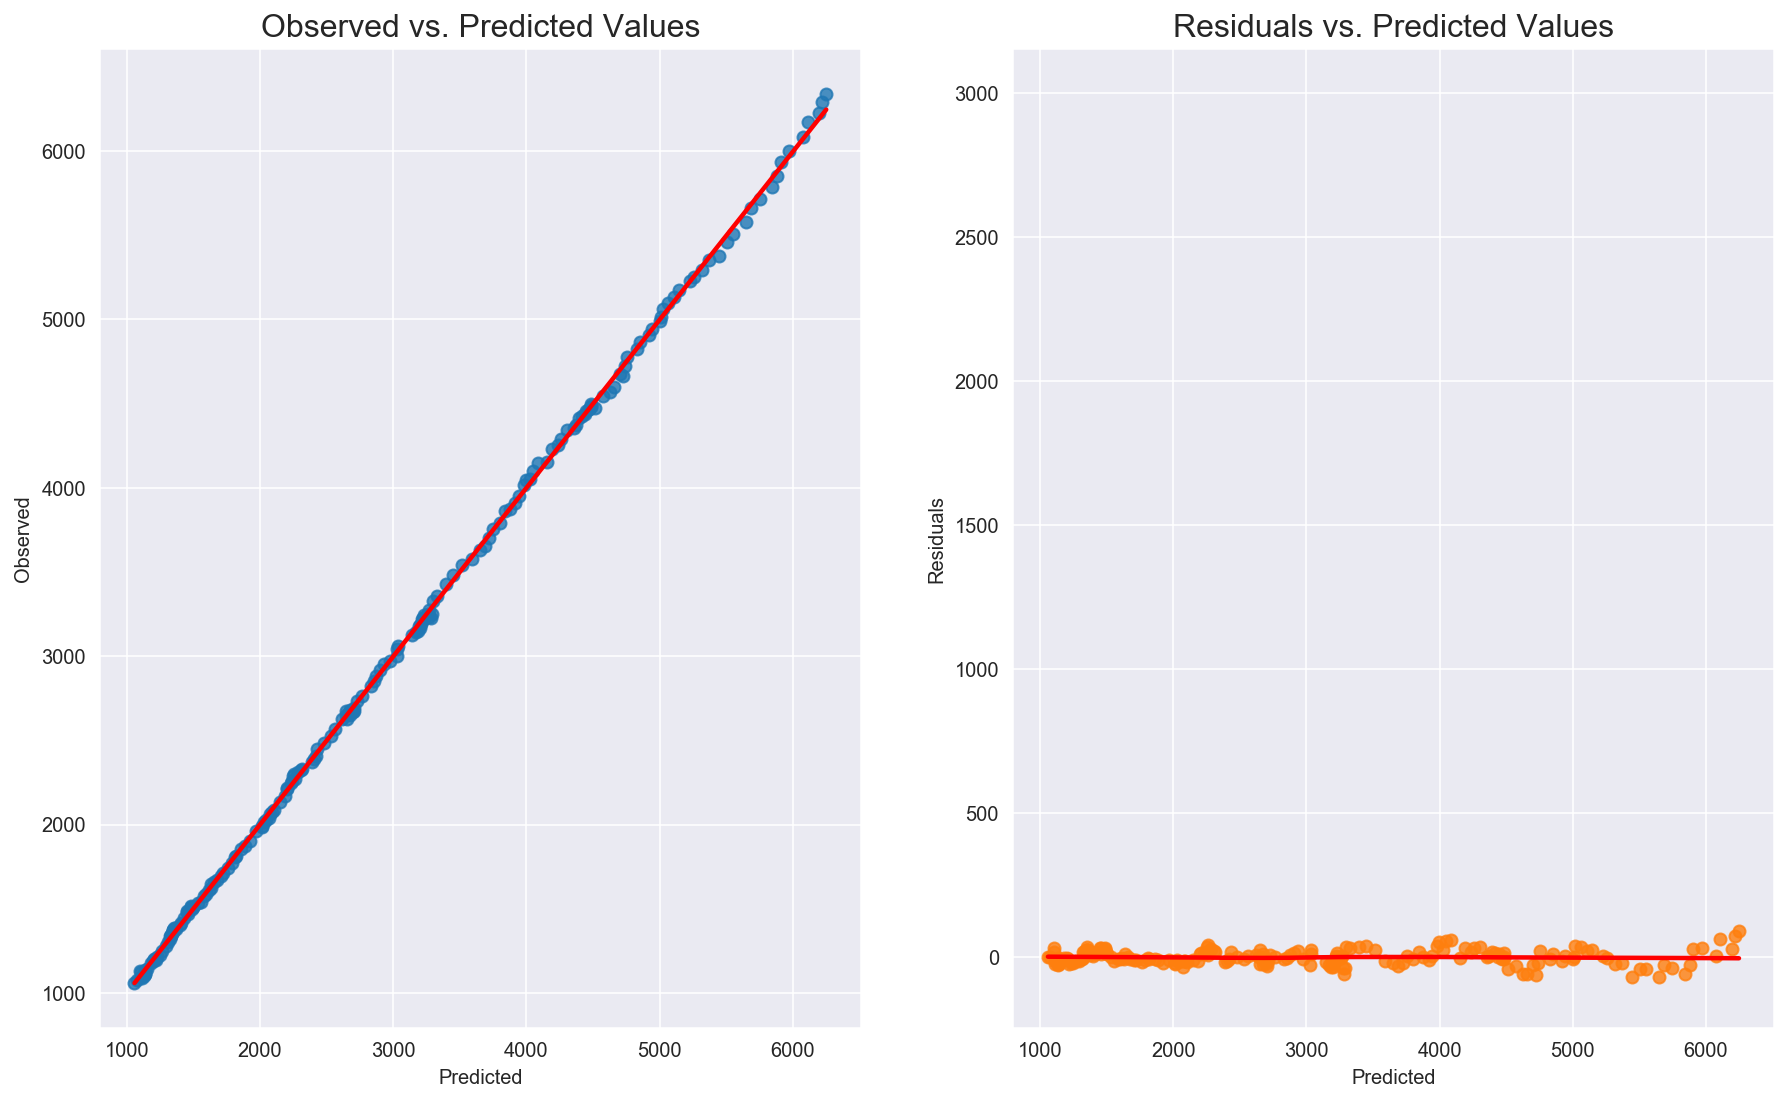

In [14]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,gdp,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
vif,2631.400542,161.870231,126.645116,1099.136994,253.157839,143.027521,1529.793768,9.735565,321.891558,2199.237623,1599.630391


In [21]:
import statsmodels.formula.api as sm

model = sm.ols(formula= 'y~dpi+unemp', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.535e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          1.37e-267
Time:                        10:37:14   Log-Likelihood:                -1151.7
No. Observations:                 204   AIC:                             2309.
Df Residuals:                     201   BIC:                             2319.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9378     18.986      4.632      0.000      50.501     125.375
dpi            0.9312      0.003    292.778      0.000       0.925       0.937
unemp        -35.2352      3.192    -11.039      0.000     -41.529     -28.941
==============================================================================
Omnibus:                       21.931   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.586
Skew:                           0.753   Prob(JB):                     1.69e-06
Kurtosis:                       3.926   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
import statsmodels.formula.api as sm

model = sm.ols(formula= 'y~government+dpi+cpi+m1+unemp+population', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.917e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          1.38e-269
Time:                        10:55:47   Log-Likelihood:                -1125.4
No. Observations:                 204   AIC:                             2265.
Df Residuals:                     197   BIC:                             2288.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5793    169.173      0.240      0.811    -293.044     374.202
government    -0.4437      0.095     -4.691      0.000      -0.630      -0.257
dpi            0.9093      0.043     21.152      0.000       0.825       0.994
cpi            0.0997      0.302      0.331      0.741      -0.495       0.694
m1             0.2458      0.080      3.064      0.002       0.088       0.404
unemp        -37.5464      4.585     -8.189      0.000     -46.589     -28.504
population     2.0648      1.527      1.352      0.178      -0.947       5.077
==============================================================================
Omnibus:                       49.944   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.632
Skew:                           1.138   Prob(JB):                     4.25e-24
Kurtosis:                       5.735   Cond. No.                     1.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""